In [1]:
# https://www.vengaglobal.com/blog/simplified-traditional-chinese-mandarin-cantonese/

# Target Market  Written      Spoken
# -------------------------------------
# China          Simplified   Mandarin
# Singapore      Simplified   Mandarin
# Taiwan         Traditional  Mandarin
# Hong Kong      Traditional  Cantonese

# Lexicon:
# http://www.chineselexicaldatabase.com/download.php - used below
# Sun, C. C., Hendrix, P., Ma, J.Q. & Baayen, R. H. (2018). Chinese Lexical Database (CLD): A large-scale lexical database for simplified Mandarin Chinese. Behavior Research Methods, https://doi.org/10.3758/s13428-018-1038-3.

# Corpora:
# https://www.openslr.org/38/ - test-audio corpus, not relevant
# https://github.com/CLUEbenchmark/CLUECorpus2020/ - email request sent
# https://github.com/brightmart/nlp_chinese_corpus - nearly same as above downloaded, used further

# TODO:
# https://metatext.io/datasets/nlp-chinese-corpus - paper with word segmentation


In [67]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

from importlib import reload  # Python 3.4+

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

plt.rcParams['font.family'] = ['Heiti TC']

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']

from pygents.util import * 
from pygents.text import * 
from pygents.plot import * 
from pygents.token import * 


In [3]:
path = '../../nlp/corpora/Chinese/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_texts = list(test_df['zh'])
print(len(test_texts))
test_df[['zh']]


100


,zh
0,然后医疗保险呢？就是我们家，不论是大人啊还是小孩都会去买一个保险
1,当他们买了保险的，按照保险合同的话，是要赔三十万的
2,需要意识到买了一个保险的重要性
3,其实这种现象是真的很普遍，因为比如说你买一个人身意外险你那个你买的越多你那个保额就越多
4,这代父母真的很有必要去买一个保险
...,...
95,蚂蚁保险不止有车险，我看到上面也有各种。
96,但是买房子呢，除了一笔首款付下去之后，每个月的贷款相当于租金
97,这种的投资性的理财，对于个人的财产来说，是具有一定风险
98,如果说你的投资方向正确，那么它是远比存款这一方面要具有更大的优势


In [6]:
ref_tokenizer = JiebaTokenizer()
lex_tokenizer = LexiconIndexedTokenizer(lexicon = list(pd.read_csv(os.path.join(path,'lexicon/chineselexicaldatabase2.1.txt'))['Word']))


/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (3,4,8,9,12,13,17,18,22,23,28,29,111,112,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Load and explore full models

In [4]:
base = FreedomTokenizer(name='data/models/zh_valid_chars_3a',max_n=3,mode='chars',debug=False)


In [99]:
#'Цвели яблони и груши, над рекой плыл туман.'
text = '苹果树和梨树开花，雾气飘过河面。'
# 0.1 better than 0.01
expected = ref_tokenizer.tokenize(text)
lexicon = lex_tokenizer.tokenize(text)
print(expected)
print(lexicon,round(calc_f1(expected,lexicon),2))
actuald = FreedomBasedTokenizer(base,'ddf-','ddf+',[1],threshold=0.01).tokenize(text)
actualp = FreedomBasedTokenizer(base,'peak-','peak+',[1],threshold=0.01).tokenize(text)
print(actuald,round(calc_f1(expected,actuald),2))
print(actualp,round(calc_f1(expected,actualp),2))
actuald = FreedomBasedTokenizer(base,'ddf-','ddf+',[1],threshold=0.1).tokenize(text)
actualp = FreedomBasedTokenizer(base,'peak-','peak+',[1],threshold=0.1).tokenize(text)
print(actuald,round(calc_f1(expected,actuald),2))
print(actualp,round(calc_f1(expected,actualp),2))


['苹果树', '和', '梨树', '开花', '，', '雾气', '飘过', '河面', '。']
['苹果树', '和', '梨树', '开花', '，', '雾气', '飘', '过', '河面', '。'] 0.84
['苹果', '树', '和', '梨树', '开', '花', '，', '雾气飘', '过', '河', '面', '。'] 0.38
['苹', '果', '树', '和', '梨树', '开', '花', '，', '雾', '气', '飘', '过', '河面。'] 0.27
['苹果树', '和', '梨树', '开花', '，', '雾气飘', '过', '河面', '。'] 0.78
['苹果', '树', '和', '梨树', '开', '花', '，', '雾', '气', '飘', '过', '河面。'] 0.29


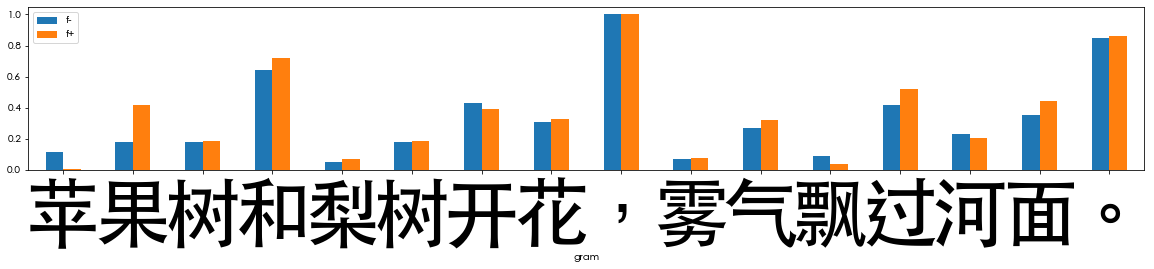

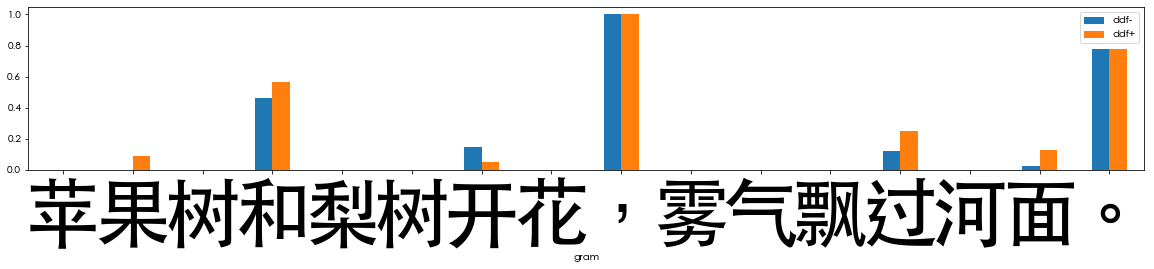

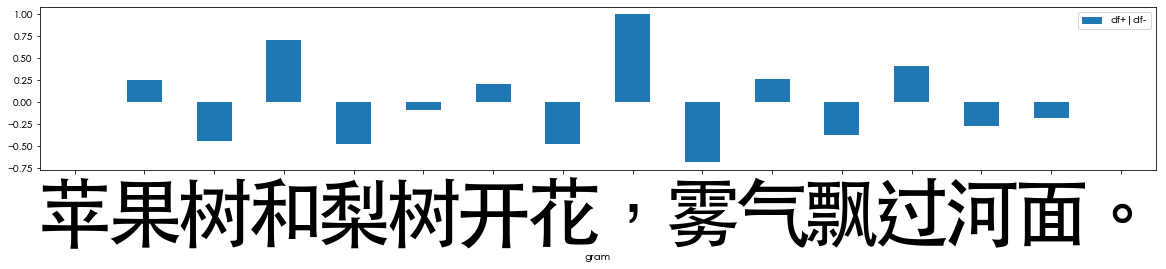

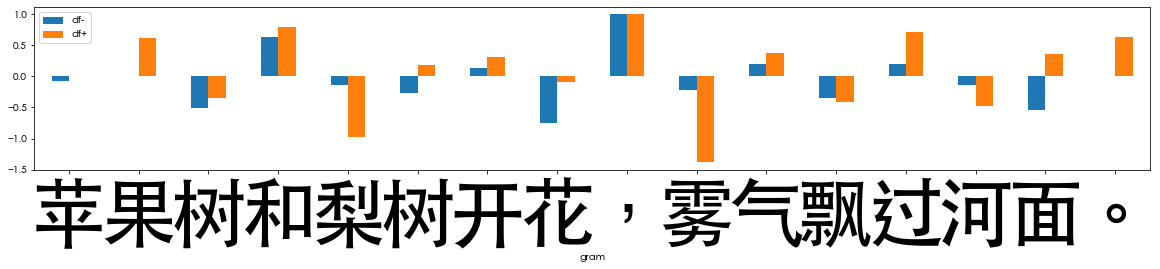

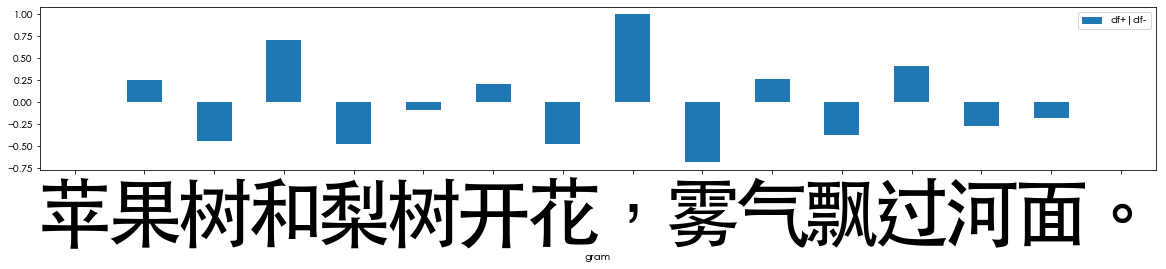

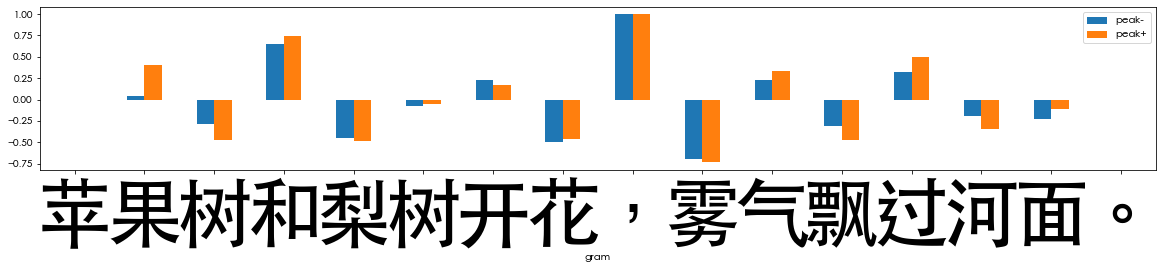

In [83]:
df = profile_freedoms_avg_df(base.model,text,['f-','f+','ddf-','ddf+','ddf+|ddf-','df-','df+','df+|df-','peak+','peak-'],[1])
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])
plot_bars(df,'gram',['df+|df-'])
plot_bars(df,'gram',['df-','df+'])
plot_bars(df,'gram',['df+|df-'])
plot_bars(df,'gram',['peak-','peak+'])


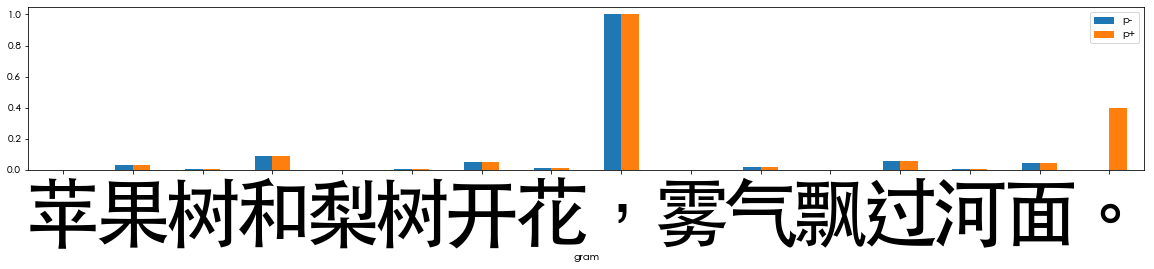

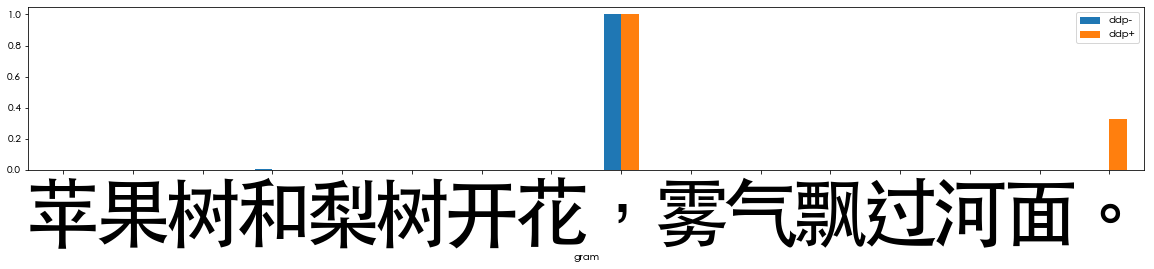

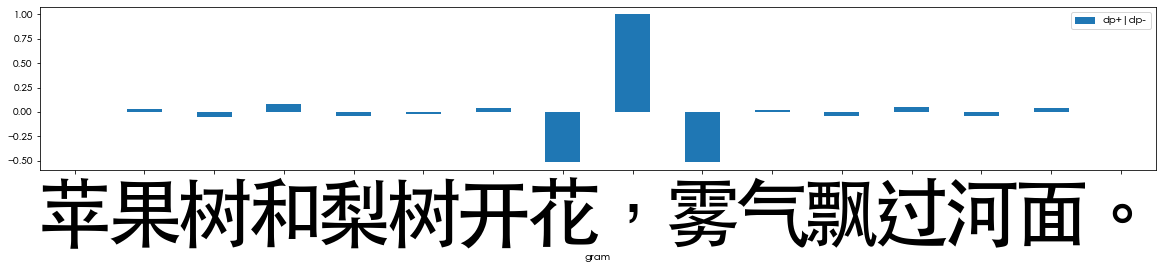

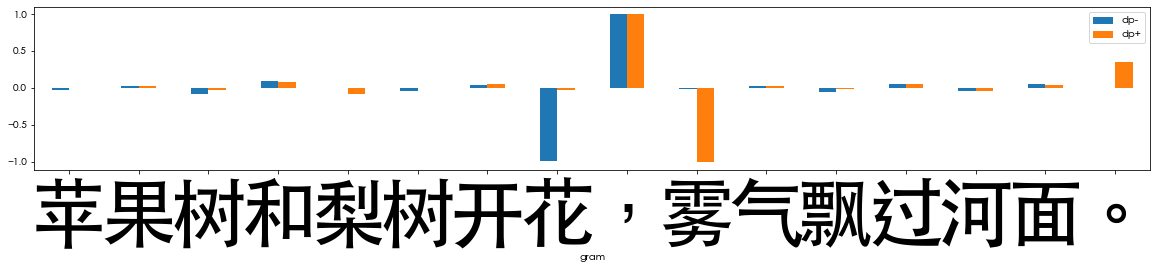

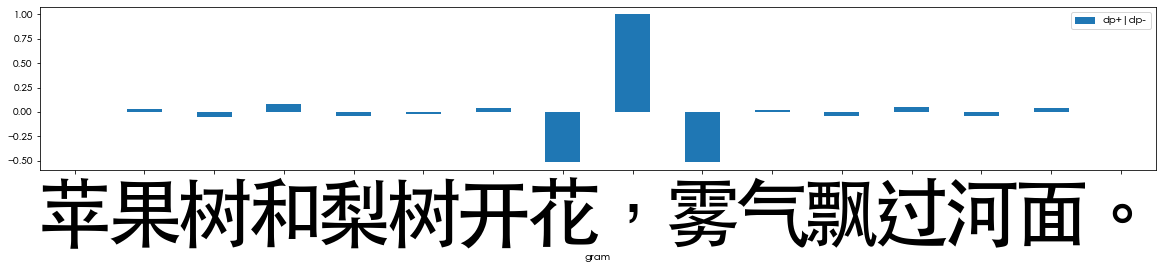

In [84]:
df = profile_probabilities_avg_df(base.model,text,['p-','p+','ddp-','ddp+','ddp+|ddp-','dp-','dp+','dp+|dp-'],[1])
plot_bars(df,'gram',['p-','p+'])
plot_bars(df,'gram',['ddp-','ddp+'])
plot_bars(df,'gram',['dp+|dp-'])
plot_bars(df,'gram',['dp-','dp+'])
plot_bars(df,'gram',['dp+|dp-'])

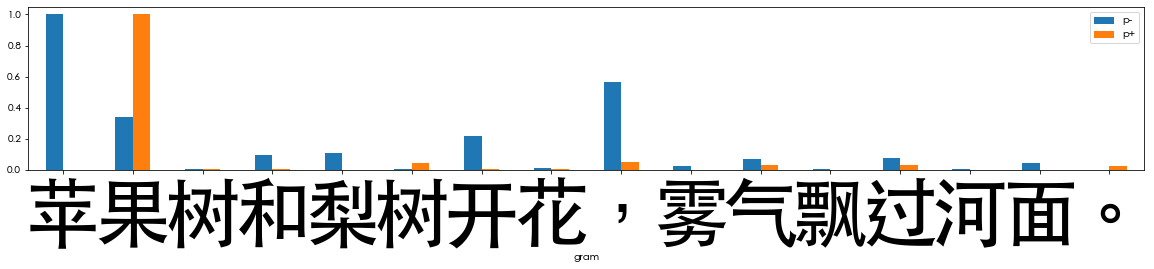

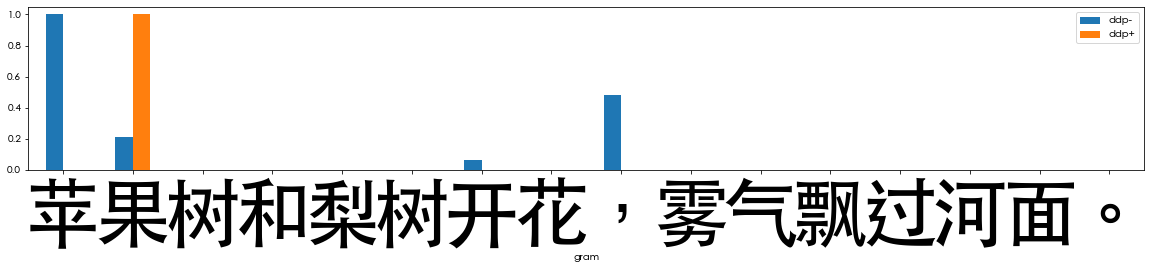

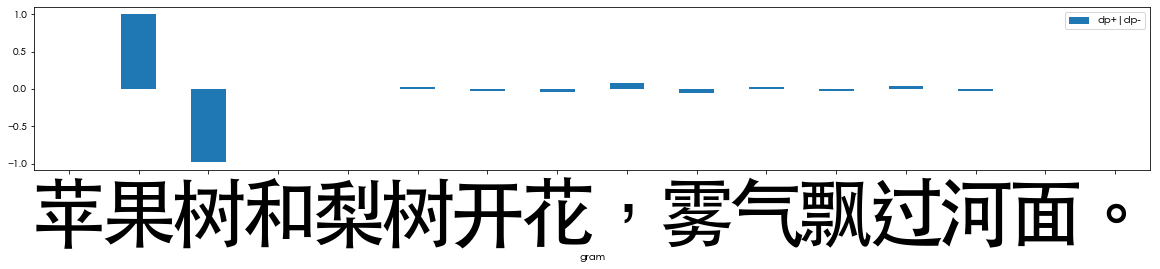

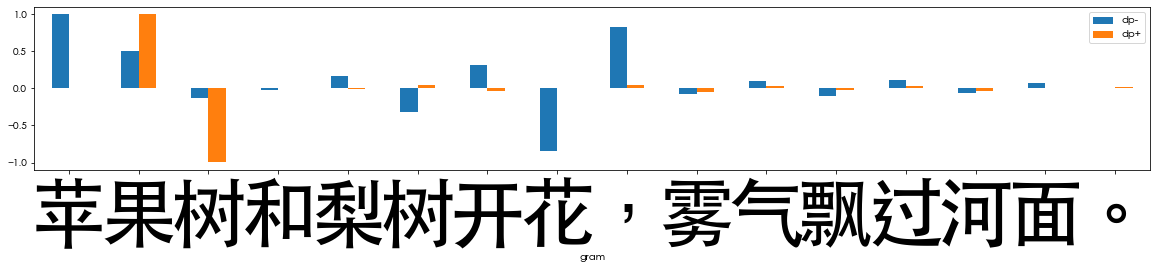

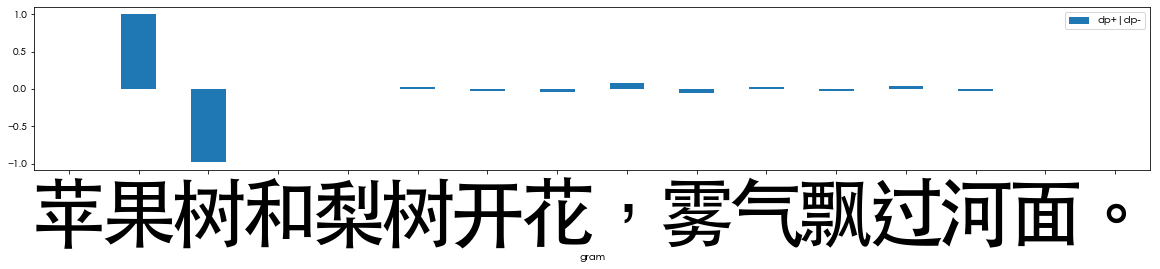

In [41]:
df = profile_probabilities_avg_df(base.model,text,['p-','p+','ddp-','ddp+','ddp+|ddp-','dp-','dp+','dp+|dp-'],[2])
plot_bars(df,'gram',['p-','p+'])
plot_bars(df,'gram',['ddp-','ddp+'])
plot_bars(df,'gram',['dp+|dp-'])
plot_bars(df,'gram',['dp-','dp+'])
plot_bars(df,'gram',['dp+|dp-'])

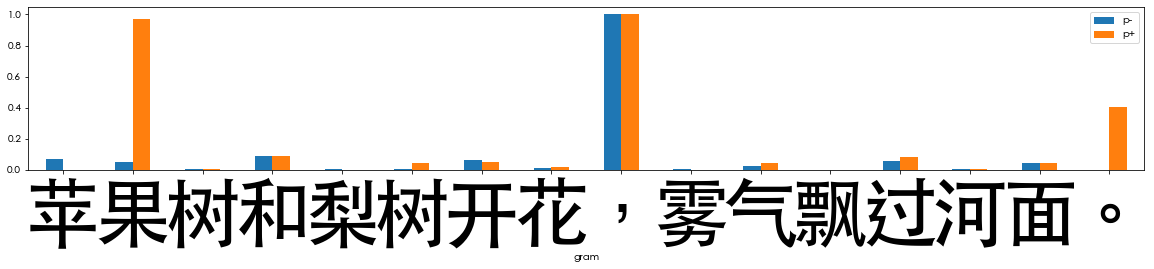

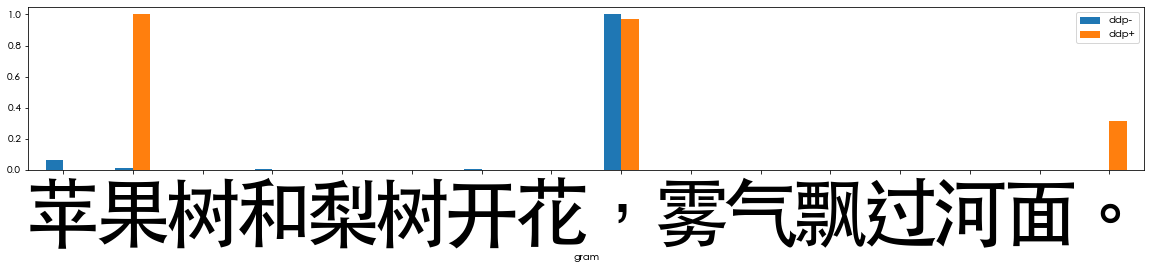

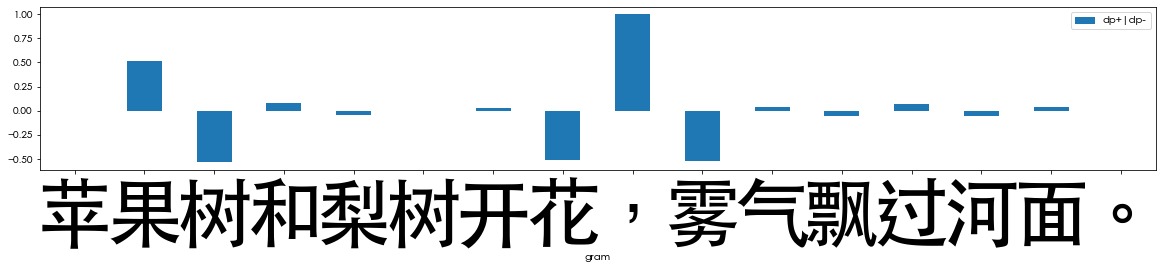

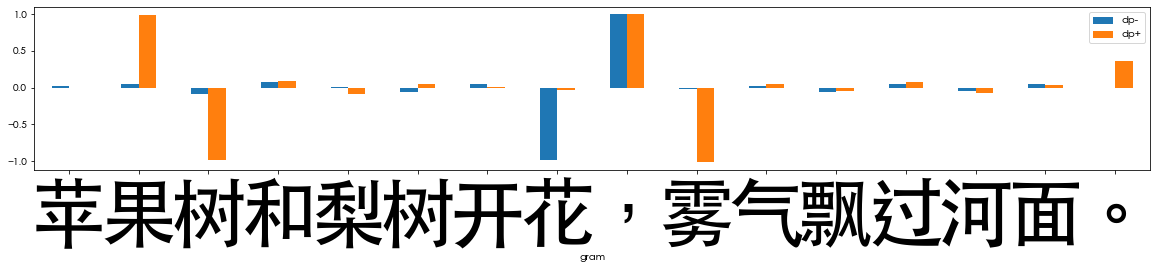

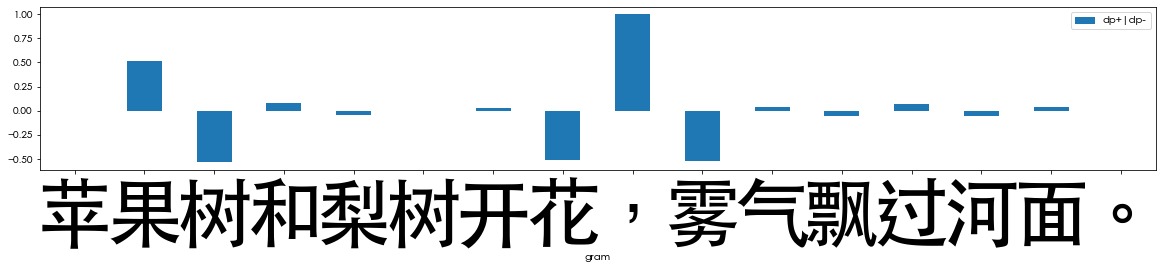

In [42]:
df = profile_probabilities_avg_df(base.model,text,['p-','p+','ddp-','ddp+','ddp+|ddp-','dp-','dp+','dp+|dp-'],[1,2])
plot_bars(df,'gram',['p-','p+'])
plot_bars(df,'gram',['ddp-','ddp+'])
plot_bars(df,'gram',['dp+|dp-'])
plot_bars(df,'gram',['dp-','dp+'])
plot_bars(df,'gram',['dp+|dp-'])

In [86]:
for threshold in [0.02,0.05,0.1,0.2,0.3,0.4,0.5]: 
        expected = ref_tokenizer.tokenize(text)
        tokens = FreedomBasedTokenizer(base,'peak-','peak+',[1],threshold=threshold).tokenize(text)
        print(nlist,threshold,round(calc_f1(expected,tokens),2),tokens)
for threshold in [0.02,0.05,0.1,0.2,0.3,0.4,0.5]: 
        expected = ref_tokenizer.tokenize(text)
        tokens = FreedomBasedTokenizer(base,'ddf-','ddf+',[1],threshold=threshold).tokenize(text)
        print(nlist,threshold,round(calc_f1(expected,tokens),2),tokens)

[2] 0.02 0.27 ['苹', '果', '树', '和', '梨树', '开', '花', '，', '雾', '气', '飘', '过', '河面。']
[2] 0.05 0.29 ['苹果', '树', '和', '梨树', '开', '花', '，', '雾', '气', '飘', '过', '河面。']
[2] 0.1 0.29 ['苹果', '树', '和', '梨树', '开', '花', '，', '雾', '气', '飘', '过', '河面。']
[2] 0.2 0.4 ['苹果', '树', '和', '梨树', '开花', '，', '雾', '气', '飘', '过', '河面。']
[2] 0.3 0.33 ['苹果', '树', '和', '梨树开花', '，', '雾气', '飘', '过', '河面。']
[2] 0.4 0.25 ['苹果', '树', '和', '梨树开花', '，', '雾气飘过', '河面。']
[2] 0.5 0.43 ['苹果树', '和', '梨树开花', '，', '雾气飘过河面。']
[2] 0.02 0.38 ['苹果', '树', '和', '梨树', '开', '花', '，', '雾气飘', '过', '河', '面', '。']
[2] 0.05 0.63 ['苹果', '树', '和', '梨树', '开花', '，', '雾气飘', '过', '河面', '。']
[2] 0.1 0.78 ['苹果树', '和', '梨树', '开花', '，', '雾气飘', '过', '河面', '。']
[2] 0.2 0.63 ['苹果树', '和', '梨树开花', '，', '雾气飘过', '河面', '。']
[2] 0.3 0.53 ['苹果树', '和', '梨树开花', '，', '雾气飘过河面', '。']
[2] 0.4 0.53 ['苹果树', '和', '梨树开花', '，', '雾气飘过河面', '。']
[2] 0.5 0.29 ['苹果树和', '梨树开花', '，', '雾气飘过河面', '。']


In [20]:
print('f-','f+')
for nlist in [[1],[1,2],[2]]:
    for threshold in [0.02,0.05,0.1,0.2,0.3,0.4,0.5]: 
        expected = ref_tokenizer.tokenize(text)
        tokens = FreedomBasedTokenizer(base,'f-','f+',[1],threshold=threshold).tokenize(text)
        print(nlist,threshold,round(calc_f1(expected,tokens),2),tokens)
print('ddf-','ddf+')
for nlist in [[1],[1,2],[2]]:
    for threshold in [0.02,0.05,0.1,0.2,0.3,0.4,0.5]: 
        expected = ref_tokenizer.tokenize(text)
        tokens = FreedomBasedTokenizer(base,'ddf-','ddf+',[1],threshold=threshold).tokenize(text)
        print(nlist,threshold,round(calc_f1(expected,tokens),2),tokens)


f- f+
[1] 0.02 0.24 ['苹', '果', '树', '和', '梨', '树', '开', '花', '，', '雾', '气', '飘', '过', '河', '面', '。']
[1] 0.05 0.24 ['苹', '果', '树', '和', '梨', '树', '开', '花', '，', '雾', '气', '飘', '过', '河', '面', '。']
[1] 0.1 0.24 ['苹', '果', '树', '和', '梨', '树', '开', '花', '，', '雾', '气', '飘', '过', '河', '面', '。']
[1] 0.2 0.35 ['苹果', '树', '和', '梨树', '开', '花', '，', '雾', '气', '飘', '过', '河', '面', '。']
[1] 0.3 0.45 ['苹果', '树', '和', '梨树', '开', '花', '，', '雾气', '飘', '过', '河', '面', '。']
[1] 0.4 0.63 ['苹果', '树', '和', '梨树', '开花', '，', '雾气飘', '过', '河面', '。']
[1] 0.5 0.63 ['苹果树', '和', '梨树开花', '，', '雾气飘过', '河面', '。']
[1, 2] 0.02 0.24 ['苹', '果', '树', '和', '梨', '树', '开', '花', '，', '雾', '气', '飘', '过', '河', '面', '。']
[1, 2] 0.05 0.24 ['苹', '果', '树', '和', '梨', '树', '开', '花', '，', '雾', '气', '飘', '过', '河', '面', '。']
[1, 2] 0.1 0.24 ['苹', '果', '树', '和', '梨', '树', '开', '花', '，', '雾', '气', '飘', '过', '河', '面', '。']
[1, 2] 0.2 0.35 ['苹果', '树', '和', '梨树', '开', '花', '，', '雾', '气', '飘', '过', '河', '面', '。']
[1, 2] 0.3 0.45 ['苹果', '树', '和',

## Profiling financial corpora  

In [97]:
# 0.01 better than 0.1
text = test_texts[0]
expected = ref_tokenizer.tokenize(text)
lexicon = lex_tokenizer.tokenize(text)
print(expected)
print(lexicon,round(calc_f1(expected,lexicon),2))
actuald = FreedomBasedTokenizer(base,'ddf-','ddf+',[1],threshold=0.01).tokenize(text)
actualp = FreedomBasedTokenizer(base,'peak-','peak+',[1],threshold=0.01).tokenize(text)
print(actuald,round(calc_f1(expected,actuald),2))
print(actualp,round(calc_f1(expected,actualp),2))
actuald = FreedomBasedTokenizer(base,'ddf-','ddf+',[1],threshold=0.1).tokenize(text)
actualp = FreedomBasedTokenizer(base,'peak-','peak+',[1],threshold=0.1).tokenize(text)
print(actuald,round(calc_f1(expected,actuald),2))
print(actualp,round(calc_f1(expected,actualp),2))


['然后', '医疗保险', '呢', '？', '就是', '我们', '家', '，', '不论是', '大人', '啊', '还是', '小孩', '都', '会', '去', '买', '一个', '保险']
['然后', '医疗', '保险', '呢', '？', '就是', '我们', '家', '，', '不论是', '大人', '啊', '还是', '小孩', '都会', '去', '买', '一个', '保险'] 0.84
['然', '后', '医疗保险呢', '？', '就', '是', '我们', '家', '，', '不论', '是', '大', '人', '啊', '还', '是', '小', '孩', '都', '会', '去', '买', '一', '个', '保险'] 0.45
['然', '后', '医疗', '保', '险', '呢？', '就', '是', '我们家', '，', '不论', '是', '大', '人', '啊', '还', '是', '小孩', '都', '会', '去', '买', '一', '个', '保险'] 0.36
['然', '后', '医疗保险呢？', '就', '是', '我们家', '，', '不论', '是', '大', '人', '啊', '还', '是', '小', '孩', '都会', '去买', '一', '个', '保险'] 0.15
['然', '后', '医疗', '保险', '呢？', '就', '是', '我们家', '，', '不论', '是', '大人', '啊还', '是', '小孩', '都', '会', '去', '买', '一', '个', '保险'] 0.39


In [80]:
for text in test_texts[:10]:
    expected = ref_tokenizer.tokenize(text)
    lexicon = lex_tokenizer.tokenize(text)
    actual = FreedomBasedTokenizer(base,'ddf-','ddf+',[1],threshold=0.1).tokenize(text)
    print(expected)
    print(lexicon,round(calc_f1(expected,lexicon),2))
    print(actual,round(calc_f1(expected,actual),2))
    print()


['然后', '医疗保险', '呢', '？', '就是', '我们', '家', '，', '不论是', '大人', '啊', '还是', '小孩', '都', '会', '去', '买', '一个', '保险']
['然后', '医疗', '保险', '呢', '？', '就是', '我们', '家', '，', '不论是', '大人', '啊', '还是', '小孩', '都会', '去', '买', '一个', '保险'] 0.84
['然', '后', '医疗保险呢？', '就', '是', '我们家', '，', '不论', '是', '大', '人', '啊', '还', '是', '小', '孩', '都会', '去买', '一', '个', '保险'] 0.15

['当', '他们', '买', '了', '保险', '的', '，', '按照', '保险合同', '的话', '，', '是', '要', '赔', '三十万', '的']
['当', '他们', '买', '了', '保险', '的', '，', '按照', '保险', '合同', '的话', '，', '是', '要', '赔', '三', '十', '万', '的'] 0.8
['当他们买', '了', '保险', '的', '，', '按照保险合同', '的', '话', '，', '是', '要赔三十万', '的'] 0.5

['需要', '意识', '到', '买', '了', '一个', '保险', '的', '重要性']
['需要', '意识', '到', '买', '了', '一个', '保险', '的', '重要性'] 1.0
['需要', '意识', '到', '买', '了', '一', '个', '保险', '的', '重要', '性'] 0.7

['其实', '这种', '现象', '是', '真的', '很', '普遍', '，', '因为', '比如说', '你', '买', '一个', '人身', '意外险', '你', '那个', '你', '买', '的', '越', '多', '你', '那个', '保额', '就', '越', '多']
['其实', '这', '种', '现象', '是', '真的', '很', '普遍', '，', 

In [92]:
for n in [[1],[2],[1,2]]:
    for m in [['f-','f+'],['df-','df+'],['ddf-','ddf+'],['peak-','peak+']]:
        for t in [0.01,0.05,0.1,0.5]:
            f1 = evaluate_tokenizer_f1(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,m[0],m[1],n,threshold=t))
            print(n,m,t,f1)
    

[1] ['f-', 'f+'] 0.01 0.33
[1] ['f-', 'f+'] 0.05 0.33
[1] ['f-', 'f+'] 0.1 0.33
[1] ['f-', 'f+'] 0.5 0.42
[1] ['df-', 'df+'] 0.01 0.47
[1] ['df-', 'df+'] 0.05 0.47
[1] ['df-', 'df+'] 0.1 0.45
[1] ['df-', 'df+'] 0.5 0.28
[1] ['ddf-', 'ddf+'] 0.01 0.43
[1] ['ddf-', 'ddf+'] 0.05 0.43
[1] ['ddf-', 'ddf+'] 0.1 0.42
[1] ['ddf-', 'ddf+'] 0.5 0.29
[1] ['peak-', 'peak+'] 0.01 0.51
[1] ['peak-', 'peak+'] 0.05 0.52
[1] ['peak-', 'peak+'] 0.1 0.52
[1] ['peak-', 'peak+'] 0.5 0.32
[2] ['f-', 'f+'] 0.01 0.39
[2] ['f-', 'f+'] 0.05 0.51
[2] ['f-', 'f+'] 0.1 0.54
[2] ['f-', 'f+'] 0.5 0.31
[2] ['df-', 'df+'] 0.01 0.62
[2] ['df-', 'df+'] 0.05 0.62
[2] ['df-', 'df+'] 0.1 0.59
[2] ['df-', 'df+'] 0.5 0.29
[2] ['ddf-', 'ddf+'] 0.01 0.49
[2] ['ddf-', 'ddf+'] 0.05 0.47
[2] ['ddf-', 'ddf+'] 0.1 0.43
[2] ['ddf-', 'ddf+'] 0.5 0.22
[2] ['peak-', 'peak+'] 0.01 0.65
[2] ['peak-', 'peak+'] 0.05 0.63
[2] ['peak-', 'peak+'] 0.1 0.6
[2] ['peak-', 'peak+'] 0.5 0.3
[1, 2] ['f-', 'f+'] 0.01 0.33
[1, 2] ['f-', 'f+'] 0.05 0.3

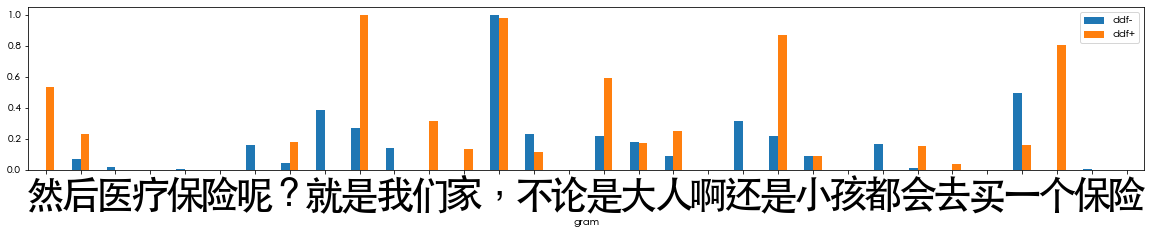

In [71]:
df = profile_freedoms_avg_df(base.model,text,['f-','f+','ddf-','ddf+','ddf+|ddf-','df-','df+','df+|df-','peak-','peak+'],[1,2])
#plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])


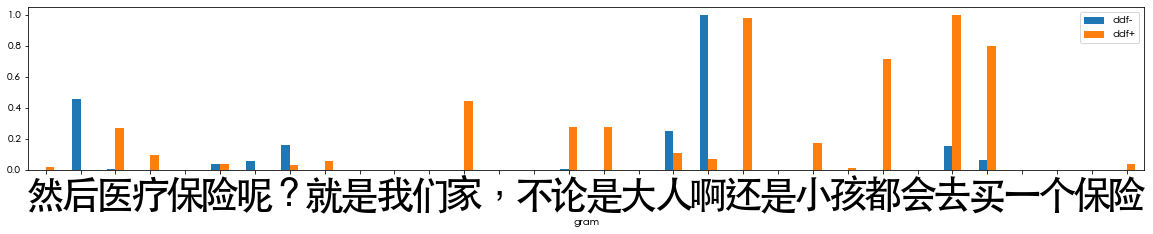

In [72]:
df = profile_freedoms_avg_df(base.model,text,['f-','f+','ddf-','ddf+','ddf+|ddf-','df-','df+','df+|df-'],[1,2],denominate=True)
#plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])


In [22]:
text = test_texts[0]
print('f-','f+')
for nlist in [[1],[1,2],[2]]:
    for threshold in [0.02,0.05,0.1,0.2,0.3,0.4,0.5]: 
        expected = ref_tokenizer.tokenize(text)
        tokens = FreedomBasedTokenizer(base,'f-','f+',[1],threshold=threshold).tokenize(text)
        print(nlist,threshold,round(calc_f1(expected,tokens),2))#,tokens)
print('ddf-','ddf+')
for nlist in [[1],[1,2],[2]]:
    for threshold in [0.02,0.05,0.1,0.2,0.3,0.4,0.5]: 
        expected = ref_tokenizer.tokenize(text)
        tokens = FreedomBasedTokenizer(base,'ddf-','ddf+',[1],threshold=threshold).tokenize(text)
        print(nlist,threshold,round(calc_f1(expected,tokens),2))#,tokens)


f- f+
[1] 0.02 0.35
[1] 0.05 0.35
[1] 0.1 0.35
[1] 0.2 0.36
[1] 0.3 0.42
[1] 0.4 0.39
[1] 0.5 0.17
[1, 2] 0.02 0.35
[1, 2] 0.05 0.35
[1, 2] 0.1 0.35
[1, 2] 0.2 0.36
[1, 2] 0.3 0.42
[1, 2] 0.4 0.39
[1, 2] 0.5 0.17
[2] 0.02 0.35
[2] 0.05 0.35
[2] 0.1 0.35
[2] 0.2 0.36
[2] 0.3 0.42
[2] 0.4 0.39
[2] 0.5 0.17
ddf- ddf+
[1] 0.02 0.45
[1] 0.05 0.2
[1] 0.1 0.15
[1] 0.2 0.18
[1] 0.3 0.26
[1] 0.4 0.15
[1] 0.5 0.16
[1, 2] 0.02 0.45
[1, 2] 0.05 0.2
[1, 2] 0.1 0.15
[1, 2] 0.2 0.18
[1, 2] 0.3 0.26
[1, 2] 0.4 0.15
[1, 2] 0.5 0.16
[2] 0.02 0.45
[2] 0.05 0.2
[2] 0.1 0.15
[2] 0.2 0.18
[2] 0.3 0.26
[2] 0.4 0.15
[2] 0.5 0.16


In [16]:
print(ref_tokenizer.tokenize(text))
print(FreedomBasedTokenizer(base,'ddf-','ddf+',[1],threshold=0.05).tokenize(text))


['苹果树', '和', '梨树', '开花', '，', '雾气', '飘过', '河面', '。']
['苹果', '树', '和', '梨树', '开花', '，', '雾气飘', '过', '河面', '。']


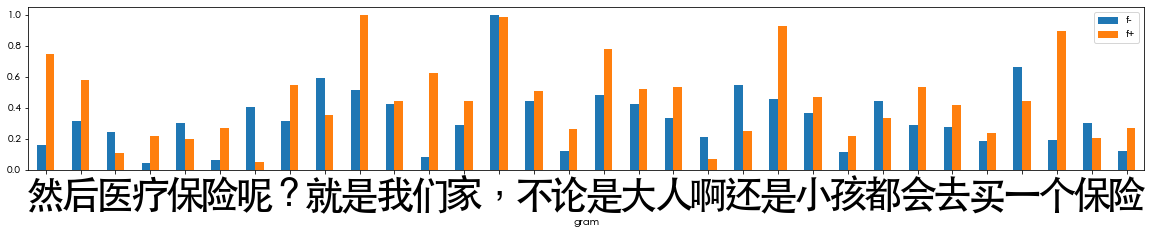

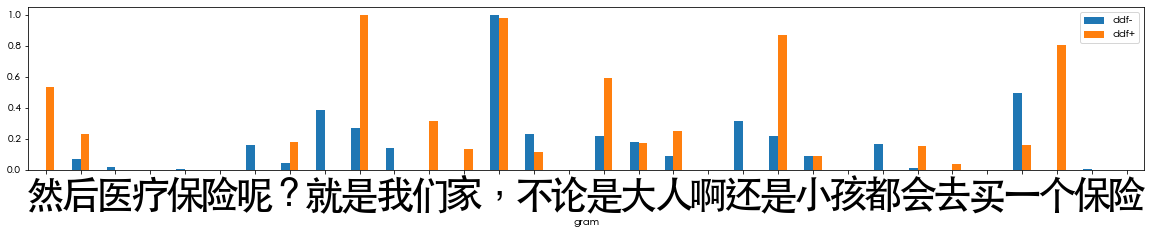

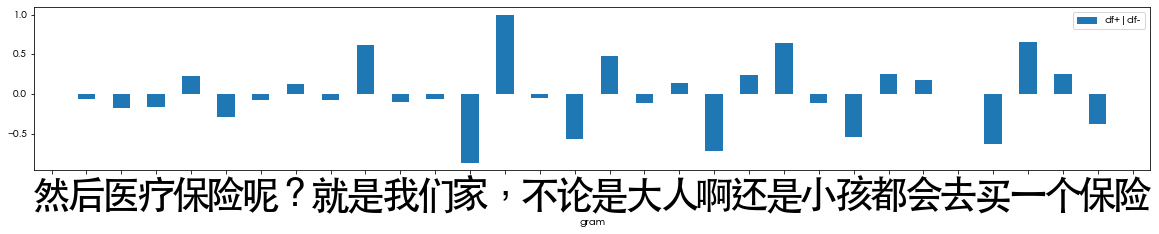

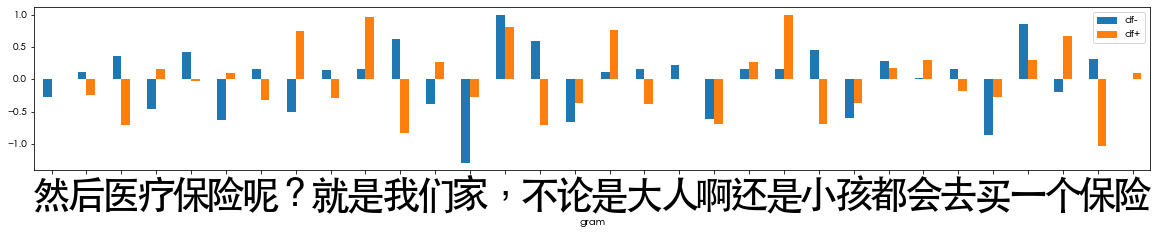

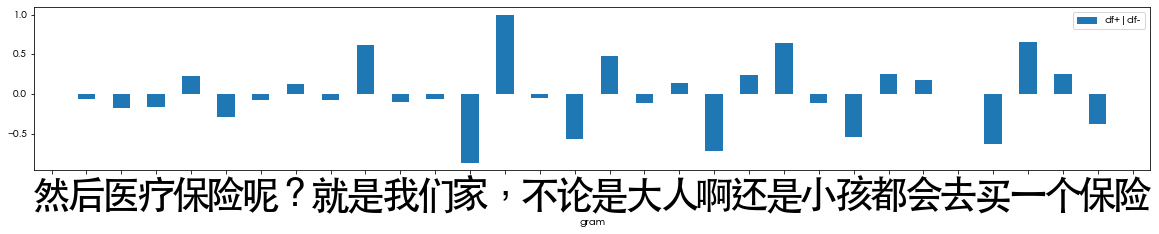

In [23]:
df = profile_freedoms_avg_df(base.model,text,['f-','f+','ddf-','ddf+','ddf+|ddf-','df-','df+','df+|df-'],[1,2])
plot_bars(df,'gram',['f-','f+'])
plot_bars(df,'gram',['ddf-','ddf+'])
plot_bars(df,'gram',['df+|df-'])
plot_bars(df,'gram',['df-','df+'])
plot_bars(df,'gram',['df+|df-'])


In [46]:
profile_probabilities(base.model[0],'面。',1,debug=True)


Back 0-0:'面'-''=面=>179715.0
Forw 1-1:'。'-''=。=>1568778.0


[(0, '面', 0, 179715.0), (1, '。', 1568778.0, 0)]

In [47]:
profile_probabilities(base.model[0],'面。',2,debug=True)

Back 0-1:'面。'-'。'=面=>0.0030259220871276878
Forw 0-1:'面。'-'面'=。=>0.026414044459282752


[(0, '面', 0, 0.0030259220871276878), (1, '。', 0.026414044459282752, 0)]

In [58]:
profile_probabilities_ex_df(base.model,'面。',1,debug=True)

Back 0-0:'面'-''=面=>179715.0
Forw 1-1:'。'-''=。=>1568778.0


,pos,gram,p+,p-,ddp+,ddp-,ddp+|ddp-,ddp+&ddp-,dp+,dp-,dp+|dp-,dp+&dp-,p+|p-,p+&p-
0,0,面,0.0,0.114557,0.0,0.057279,0.0,0.0,NaN,0.114557,NaN,NaN,0.0,0.0
1,1,。,1.0,0.000000,0.5,0.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [59]:
profile_probabilities_avg_df(base.model,'面。',['p-','p+','ddp-','ddp+','ddp+|ddp-','dp-','dp+','dp+|dp-'],[1])


,pos,gram,p-,p+,ddp-,ddp+,ddp+|ddp-,dp-,dp+,dp+|dp-
0,0,面,1.0,0.0,1.0,0.0,NaN,1.0,NaN,NaN
1,1,。,0.0,1.0,0.0,1.0,NaN,NaN,1.0,NaN


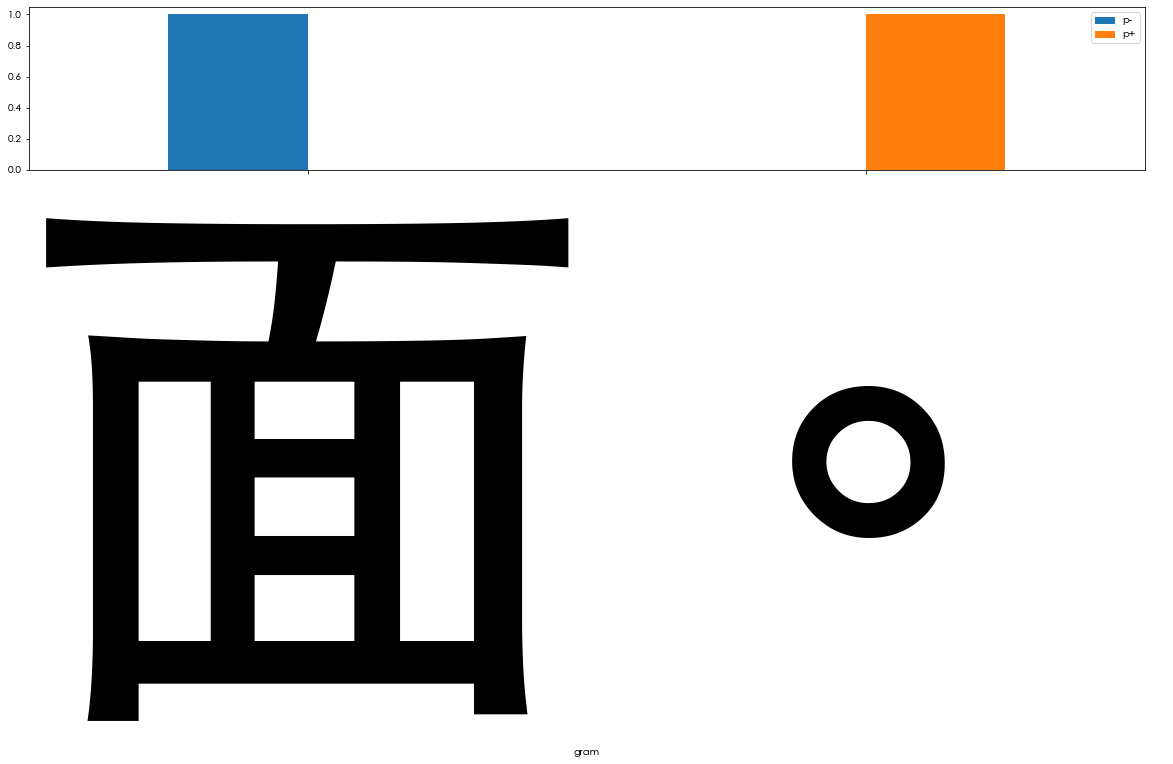

In [57]:
df = profile_probabilities_avg_df(base.model,'面。',['p-','p+','ddp-','ddp+','ddp+|ddp-','dp-','dp+','dp+|dp-'],[1])
plot_bars(df,'gram',['p-','p+'])


In [49]:
profile_freedoms(base.model,'面。',1,debug=True)


+0-0:	'面'=>面	2335	-0-0:	'面'=>面	1996
+1-1:	'。'=>。	4562	-1-1:	'。'=>。	4800


[(0, '面', 2335, 1996), (1, '。', 4562, 4800)]

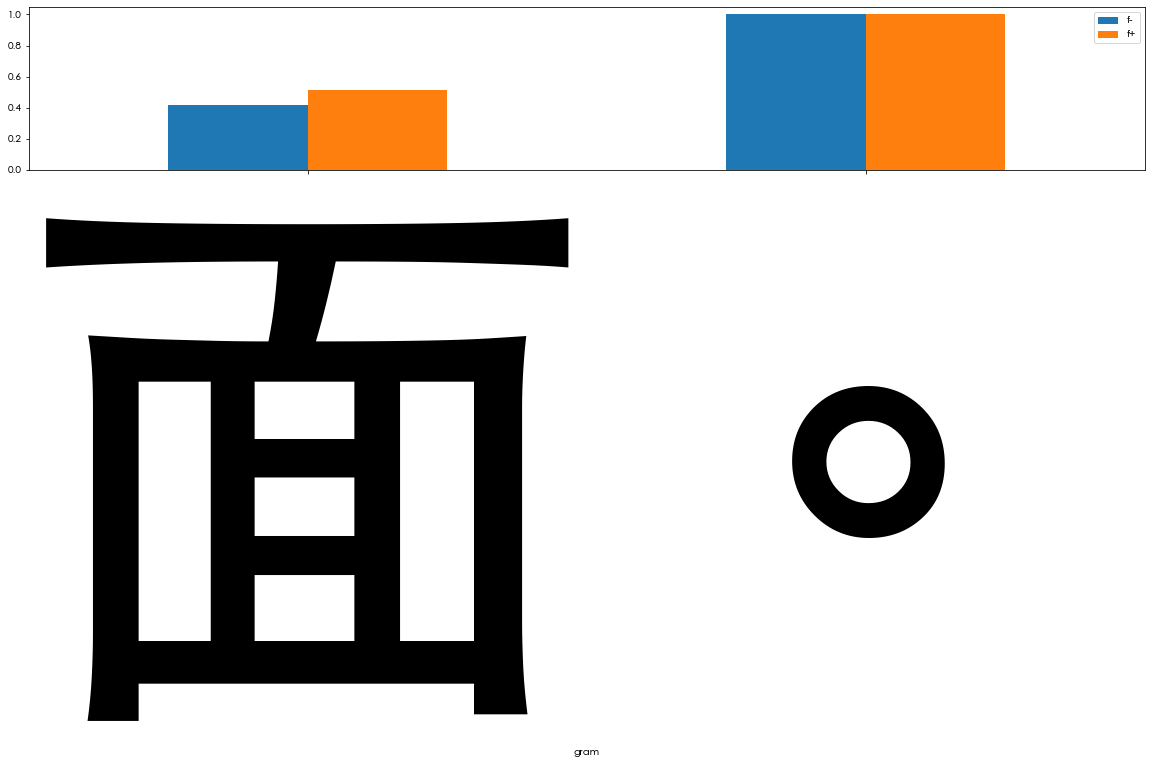

In [50]:
df = profile_freedoms_avg_df(base.model,'面。',['f-','f+','ddf-','ddf+','ddf+|ddf-','df-','df+','df+|df-'],[1])
plot_bars(df,'gram',['f-','f+'])


In [3]:
base = FreedomTokenizer(name='data/models/zh_train_chars_2a',max_n=2,mode='chars',debug=False)
model_compress_with_loss(base.model,0.001)


In [24]:
ref_tokenizer = JiebaTokenizer()
text = '汤姆对安说：“吉姆是对的，安”。' # 'Tom said to Ann, "Jim was right, Ann".'


Threshold  0
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤姆', '对安', '说：', '“', '吉姆', '是对', '的', '，', '安', '”。']
0.55
Threshold  0.05
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤姆', '对安', '说：', '“', '吉姆', '是对', '的', '，', '安', '”。']
0.55
Threshold  0.01
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤姆', '对安', '说：', '“', '吉姆', '是对', '的', '，', '安', '”。']
0.55
Threshold  0.005
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤姆', '对安', '说：', '“', '吉姆', '是对', '的', '，', '安', '”。']
0.55
Threshold  0.001
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤姆', '对安', '说：', '“', '吉姆', '是对', '的', '，', '安', '”。']
0.55
Threshold  0.0005
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤姆', '对安', '说：', '“', '吉姆', '是对', '的', '，', '安', '”。']
0.55


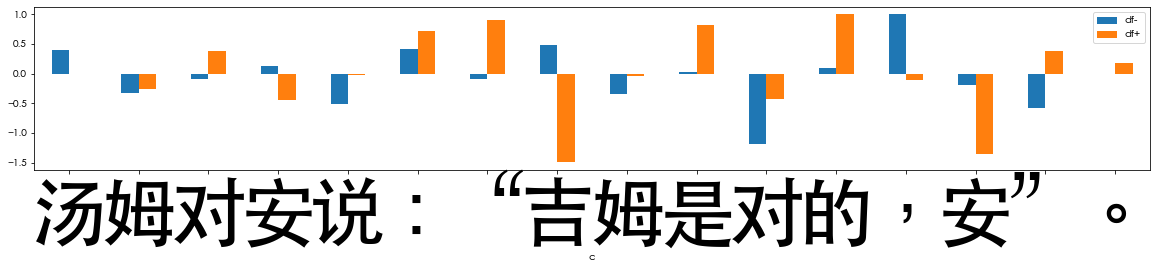

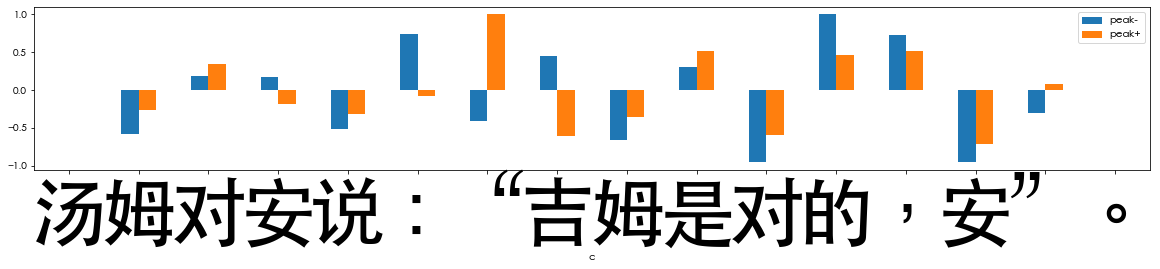

In [25]:
test_tokenizer = FreedomBasedTokenizer(base,'peak-','peak+')
for t in [0,0.05,0.01,0.005,0.001,0.0005]:
    print('Threshold ',t)
    test_tokenizer.set_options(nlist = [2], threshold=t) # expected F1=0.71
    f1 = evaluate_tokenizer_f1([text],ref_tokenizer,test_tokenizer,debug=True)
df = profile_freedoms_avg_df(base.model,text,metrics=['f-','f+','df-','df+','peak-','peak+','dvf-','dvf+'],nlist=[1])
df['c'] = list(text)
plot_bars(df,'c',['df-','df+'])
plot_bars(df,'c',['peak-','peak+'])


Threshold  0
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆', '对', '安', '说', '：', '“', '吉', '姆', '是', '对', '的', '，', '安', '”', '。']
0.64
Threshold  0.1
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆', '对安', '说', '：', '“', '吉', '姆', '是', '对', '的', '，', '安', '”', '。']
0.67
Threshold  0.15
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆对安', '说：“', '吉', '姆', '是', '对', '的', '，', '安', '”', '。']
0.58
Threshold  0.2
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆对安', '说：“', '吉姆是对', '的', '，', '安', '”', '。']
0.48
Threshold  0.3
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆对安', '说：“', '吉姆是对', '的', '，', '安', '”', '。']
0.48
Threshold  0.4
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆对安说：“', '吉姆是对', '的', '，', '安', '”', '。']
0.5
Threshold  0

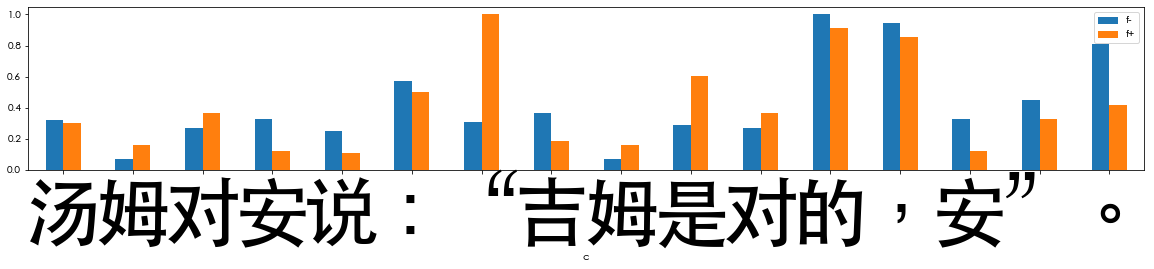

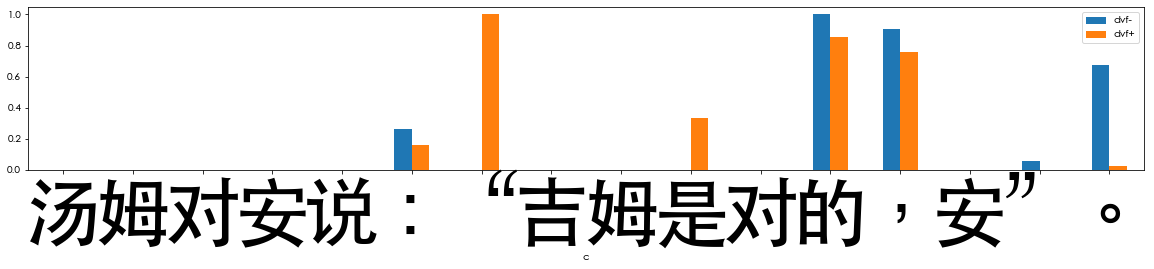

In [26]:
test_tokenizer = FreedomBasedTokenizer(base,'f-','f+')
for t in [0,0.1,0.15,0.2,0.3,0.4,0.5]:
    print('Threshold ',t)
    test_tokenizer.set_options(nlist = [2], threshold=t) # expected F1=0.71
    f1 = evaluate_tokenizer_f1([text],ref_tokenizer,test_tokenizer,debug=True)
df = profile_freedoms_avg_df(base.model,text,metrics=['f-','f+','df-','df+','peak-','peak+','dvf-','dvf+'],nlist=[1])
df['c'] = list(text)
plot_bars(df,'c',['f-','f+'])
plot_bars(df,'c',['dvf-','dvf+'])


Threshold  0.05
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆对安', '说：“', '吉姆是对', '的', '，', '安', '”', '。']
0.48
Threshold  0.01
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆对安', '说：“', '吉姆是对', '的', '，', '安', '”', '。']
0.48
Threshold  0.005
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆对安', '说：“', '吉姆是对', '的', '，', '安', '”', '。']
0.48
Threshold  0.001
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆对安', '说：“', '吉姆是对', '的', '，', '安', '”', '。']
0.48
Threshold  0.0005
汤姆对安说：“吉姆是对的，安”。
['汤姆', '对安说', '：', '“', '吉姆', '是', '对', '的', '，', '安', '”', '。']
['汤', '姆对安', '说：“', '吉姆是对', '的', '，', '安', '”', '。']
0.48


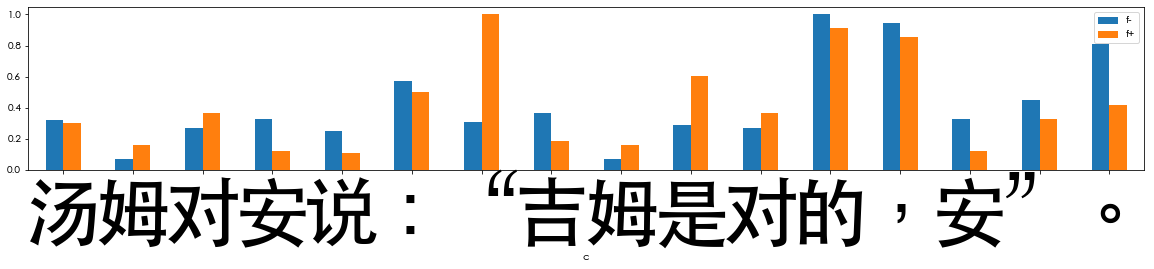

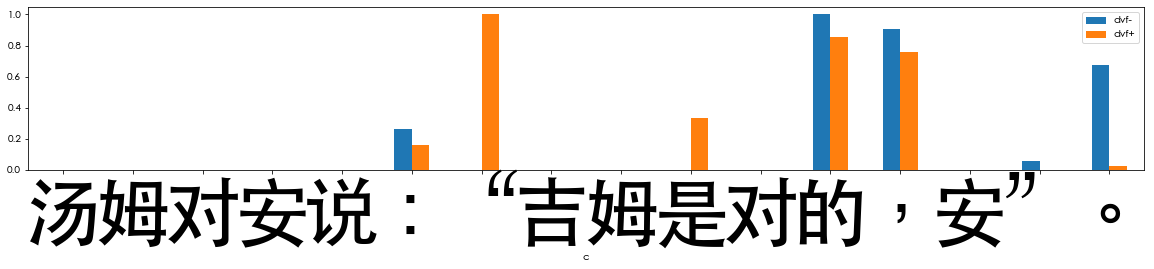

In [27]:
test_tokenizer = FreedomBasedTokenizer(base,'dvf-','dvf+')
for t in [0.05,0.01,0.005,0.001,0.0005]:
    print('Threshold ',t)
    test_tokenizer.set_options(nlist = [2], threshold=t) # expected F1=0.71
    f1 = evaluate_tokenizer_f1([text],ref_tokenizer,test_tokenizer,debug=True)
df = profile_freedoms_avg_df(base.model,text,metrics=['f-','f+','df-','df+','peak-','peak+','dvf-','dvf+'],nlist=[1])
df['c'] = list(text)
plot_bars(df,'c',['f-','f+'])
plot_bars(df,'c',['dvf-','dvf+'])


In [31]:
text = '汤姆告诉安，吉姆是对的。' # 'Tom told Ann that Jim was right.'

Threshold  0
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤姆', '告诉', '安', '，', '吉姆', '是对', '的。']
0.63
Threshold  0.05
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤姆', '告诉', '安', '，', '吉姆', '是对', '的。']
0.63
Threshold  0.01
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤姆', '告诉', '安', '，', '吉姆', '是对', '的。']
0.63
Threshold  0.005
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤姆', '告诉', '安', '，', '吉姆', '是对', '的。']
0.63
Threshold  0.001
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤姆', '告诉', '安', '，', '吉姆', '是对', '的。']
0.63
Threshold  0.0005
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤姆', '告诉', '安', '，', '吉姆', '是对', '的。']
0.63


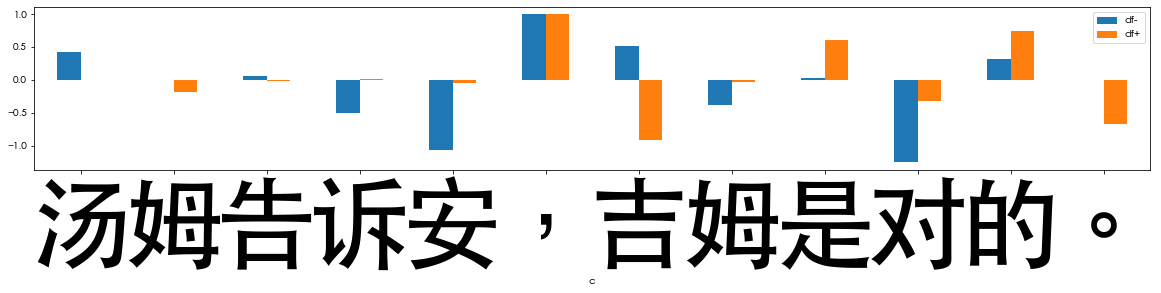

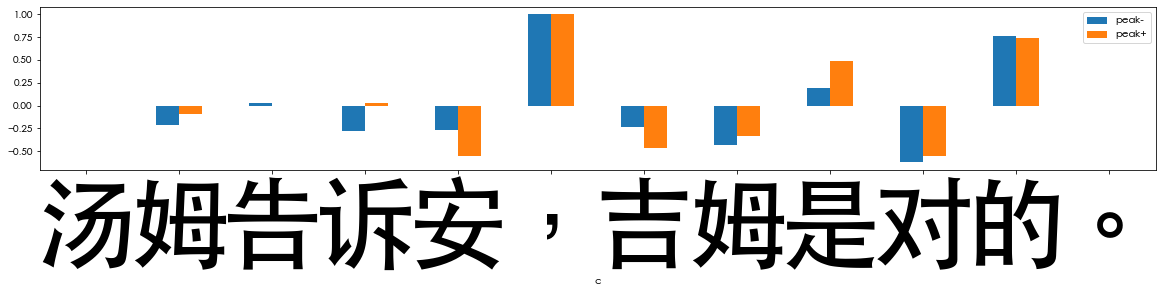

In [32]:
test_tokenizer = FreedomBasedTokenizer(base,'peak-','peak+')
for t in [0,0.05,0.01,0.005,0.001,0.0005]:
    print('Threshold ',t)
    test_tokenizer.set_options(nlist = [2], threshold=t) # expected F1=0.71
    f1 = evaluate_tokenizer_f1([text],ref_tokenizer,test_tokenizer,debug=True)
df = profile_freedoms_avg_df(base.model,text,metrics=['f-','f+','df-','df+','peak-','peak+','dvf-','dvf+'],nlist=[1])
df['c'] = list(text)
plot_bars(df,'c',['df-','df+'])
plot_bars(df,'c',['peak-','peak+'])


Threshold  0
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤', '姆', '告', '诉', '安', '，', '吉', '姆', '是', '对', '的', '。']
0.57
Threshold  0.1
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤', '姆', '告诉安', '，', '吉姆', '是', '对', '的', '。']
0.67
Threshold  0.15
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤', '姆', '告诉安', '，', '吉姆', '是对', '的', '。']
0.47
Threshold  0.2
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤', '姆', '告诉安', '，', '吉姆', '是对', '的', '。']
0.47
Threshold  0.3
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤', '姆', '告诉安', '，', '吉姆是对', '的', '。']
0.38
Threshold  0.4
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤姆', '告诉安', '，', '吉姆是对', '的', '。']
0.53
Threshold  0.5
汤姆告诉安，吉姆是对的。
['汤姆', '告诉', '安', '，', '吉姆', '是', '对', '的', '。']
['汤姆', '告诉安，', '吉姆是对', '的', '。']
0.43


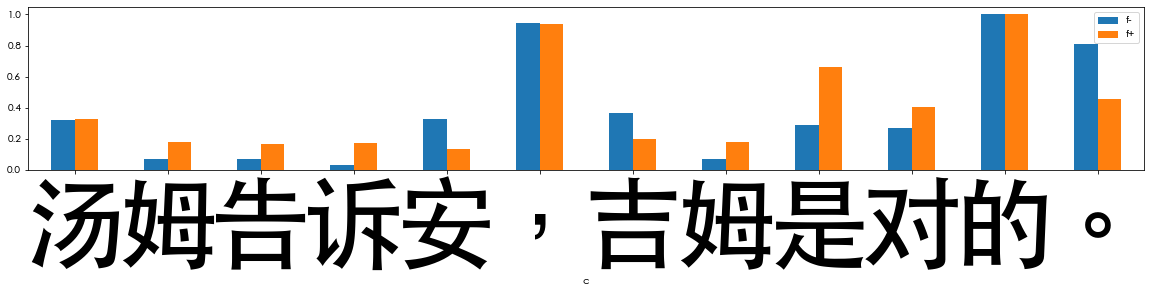

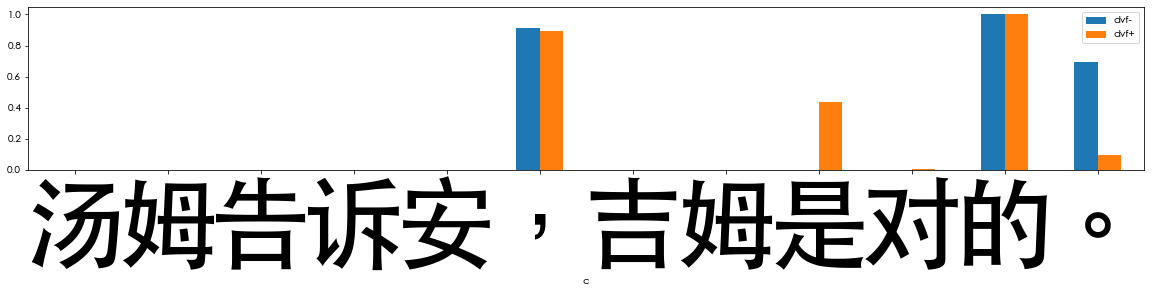

In [33]:
test_tokenizer = FreedomBasedTokenizer(base,'f-','f+')
for t in [0,0.1,0.15,0.2,0.3,0.4,0.5]:
    print('Threshold ',t)
    test_tokenizer.set_options(nlist = [2], threshold=t) # expected F1=0.71
    f1 = evaluate_tokenizer_f1([text],ref_tokenizer,test_tokenizer,debug=True)
df = profile_freedoms_avg_df(base.model,text,metrics=['f-','f+','df-','df+','peak-','peak+','dvf-','dvf+'],nlist=[1])
df['c'] = list(text)
plot_bars(df,'c',['f-','f+'])
plot_bars(df,'c',['dvf-','dvf+'])


In [34]:
text = '父亲告诉母亲，孩子是对的。' # 'The father told the mother that the child was right.'


Threshold  0.05
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的。']
0.82
Threshold  0.01
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的。']
0.82
Threshold  0.005
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的。']
0.82
Threshold  0.001
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的。']
0.82
Threshold  0.0005
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的。']
0.82
Threshold  0
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的。']
0.82


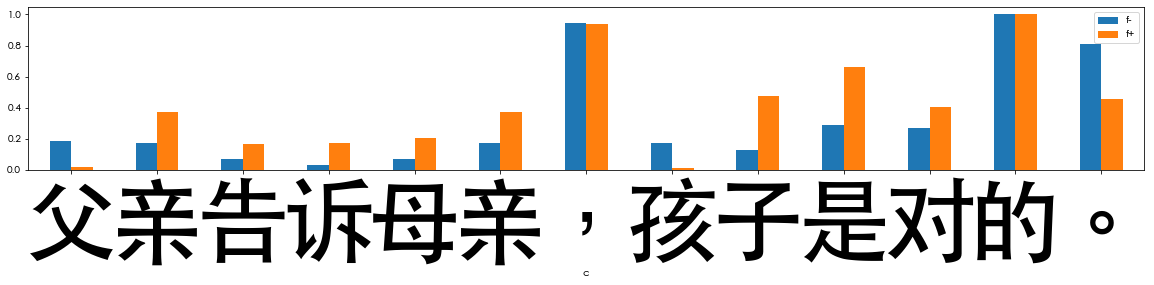

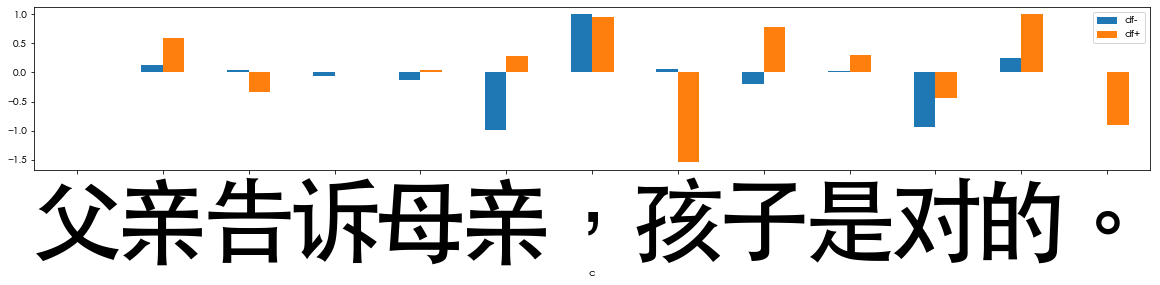

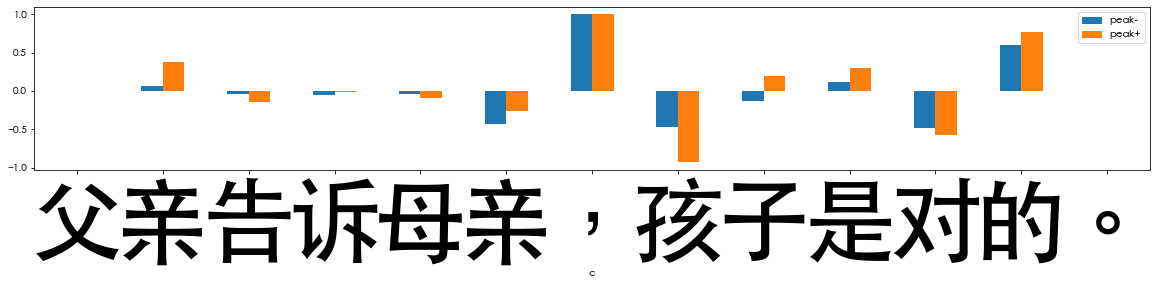

In [35]:
test_tokenizer = FreedomBasedTokenizer(base,'peak-','peak+')
for t in [0.05,0.01,0.005,0.001,0.0005,0]:
    print('Threshold ',t)
    test_tokenizer.set_options(nlist = [2], threshold=t) # expected F1=0.71
    f1 = evaluate_tokenizer_f1([text],ref_tokenizer,test_tokenizer,debug=True)
df = profile_freedoms_avg_df(base.model,text,metrics=['f-','f+','df-','df+','peak-','peak+','dvf-','dvf+'],nlist=[1])
df['c'] = list(text)
plot_bars(df,'c',['f-','f+'])
plot_bars(df,'c',['df-','df+'])
plot_bars(df,'c',['peak-','peak+'])


Threshold  0
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父', '亲', '告', '诉', '母', '亲', '，', '孩', '子', '是', '对', '的', '。']
0.45
Threshold  0.1
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉', '母亲', '，', '孩', '子', '是', '对', '的', '。']
0.84
Threshold  0.15
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
1.0
Threshold  0.2
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉母亲', '，', '孩子', '是', '对', '的', '。']
0.82
Threshold  0.3
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉母亲', '，', '孩子', '是', '对', '的', '。']
0.82
Threshold  0.4
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉母亲', '，', '孩子', '是', '对', '的', '。']
0.82
Threshold  0.5
父亲告诉母亲，孩子是对的。
['父亲', '告诉', '母亲', '，', '孩子', '是', '对', '的', '。']
['父亲', '告诉母亲', '，', '孩子是', '对', '的', '。']
0.63


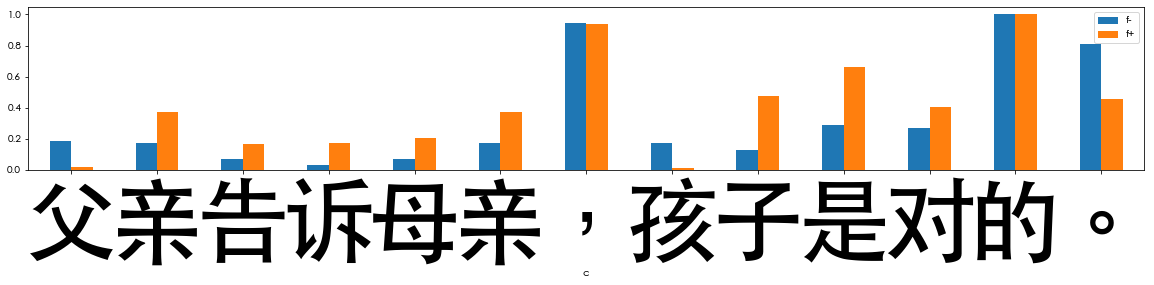

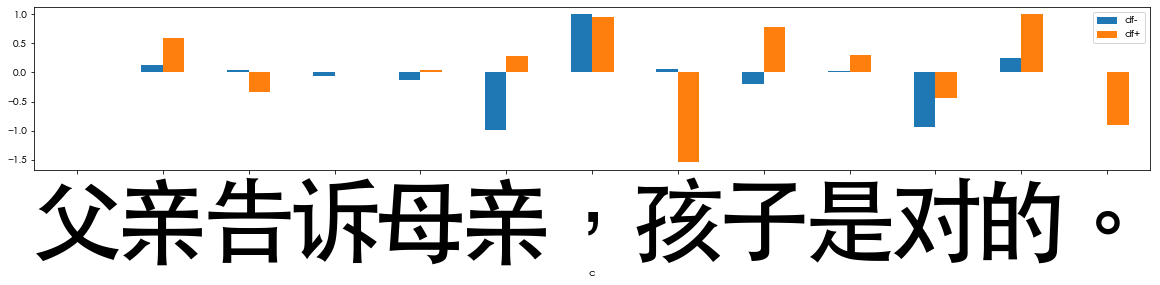

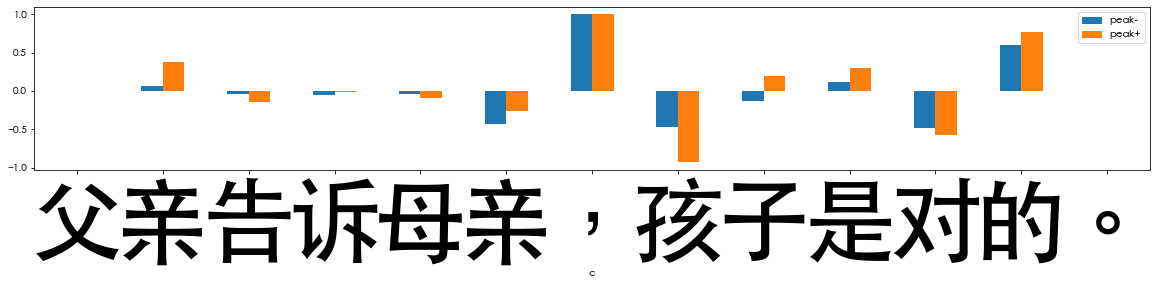

In [36]:
test_tokenizer = FreedomBasedTokenizer(base,'f-','f+')
for t in [0,0.1,0.15,0.2,0.3,0.4,0.5]:
    print('Threshold ',t)
    test_tokenizer.set_options(nlist = [2], threshold=t) # expected F1=0.71
    f1 = evaluate_tokenizer_f1([text],ref_tokenizer,test_tokenizer,debug=True)
df = profile_freedoms_avg_df(base.model,text,metrics=['f-','f+','df-','df+','peak-','peak+','dvf-','dvf+'],nlist=[1])
df['c'] = list(text)
plot_bars(df,'c',['f-','f+'])
plot_bars(df,'c',['df-','df+'])
plot_bars(df,'c',['peak-','peak+'])
